In [58]:
#import libraries:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib
import seaborn as sns
from skimage.color import rgb2gray
from PIL import Image
from skimage import io
from numpy import *
import plotnine as p9
from tensorflow.linalg import eigh

In [59]:
df = pd.read_csv("../data/AB_NYC_2019.csv")

Data Description:
Data source: http://insideairbnb.com/
48895 listings
16 features: 
    id:                  
    name:                 
    host_id:              
    host_name:            
    neighbourhood_group   
    neighbourhood         
    latitude
    longitude
    room_type
    price
    minimum_nights
    number_of_reviews
    last_review
    reviews_per_month
    calculated_host_listings_count
    availability_365

In [60]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [61]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [62]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

There are 10052 listings without reviews (last_review = NA, reviews_per_month = NA). We remove those observations.

In [63]:
df.dropna(subset=['last_review', 'name'],axis=0,inplace = True)

We will not use 'id' and 'host_name' features since it is irrelevant/unethical to our exploration.

In [64]:
df.drop(['id','host_name'], axis=1, inplace=True)

New dataframe has:
- 38837 unique listings
- 14 features.
- 0 Nan values.

### Exploring Collinearity between variables
- Cold colors represent higher correlations and hotter colors for lower correlations.
- Darker colors represent a higher magnitude, and brighter colors represent lower magnitude.
- ie. light blue is a positive correlation near 0. dark red is negative correlation near -1.
- It appears that number of reviews and reviews_per_month are highly correlated. No other pair of unique variables demonstrates a high correlation. 

<AxesSubplot:>

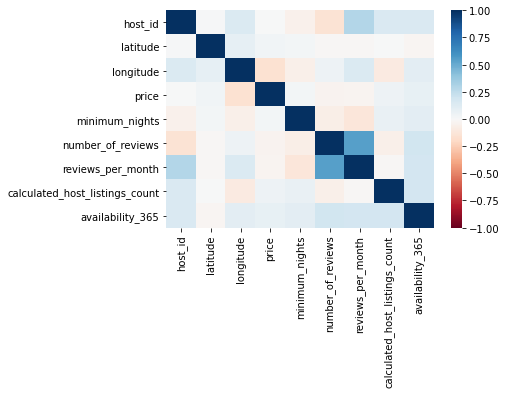

In [65]:
ryb = matplotlib.colors.LinearSegmentedColormap.from_list("", ["green","yellow","red"])
corr = df.corr()
corr.style.set_precision(3).background_gradient(cmap='RdBu', vmin=-1, vmax=1)
sns.heatmap(df.corr(), vmin = -1, vmax = 1, cmap = 'RdBu')

In [67]:
X_train = df[['host_id','latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
print(X_train)
Y_train = df[['price']]
print(Y_train)

         host_id  latitude  longitude  minimum_nights  number_of_reviews  \
0           2787  40.64749  -73.97237               1                  9   
1           2845  40.75362  -73.98377               1                 45   
3           4869  40.68514  -73.95976               1                270   
4           7192  40.79851  -73.94399              10                  9   
5           7322  40.74767  -73.97500               3                 74   
...          ...       ...        ...             ...                ...   
48782   83554966  40.78099  -73.95366               1                  1   
48790  257683179  40.75104  -73.81459               1                  1   
48799  211644523  40.54179  -74.14275               1                  1   
48805  273841667  40.80787  -73.92400               1                  2   
48852   74162901  40.69805  -73.92801               1                  1   

       reviews_per_month  calculated_host_listings_count  availability_365  
0         